1. Date time standard format
2. 

In [99]:
import pandas as pd
import numpy as np

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [138]:
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [102]:
data=pd.read_csv('AirPassengers.csv')

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [104]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [105]:
# to convert the date format into standard format
data['Month']=data['Month'].apply(lambda x: dt(int(x[0:4]),int(x[5:]),6))

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [107]:
data.head()

,Month,#Passengers
0,1949-01-06,112
1,1949-02-06,118
2,1949-03-06,132
3,1949-04-06,129
4,1949-05-06,121


In [108]:
# making the date column as index
data.set_index('Month',inplace=True)

In [109]:
data.head()

,#Passengers
Month,
1949-01-06,112
1949-02-06,118
1949-03-06,132
1949-04-06,129
1949-05-06,121


In [110]:
ts=data['#Passengers']

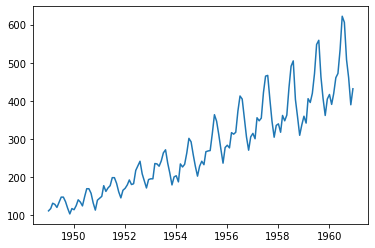

In [111]:
plt.plot(ts)

In [112]:
# we compressed the data using log func
ts_log=np.log(ts)
ts_log

Month
1949-01-06    4.718499
1949-02-06    4.770685
1949-03-06    4.882802
1949-04-06    4.859812
1949-05-06    4.795791
                ...   
1960-08-06    6.406880
1960-09-06    6.230481
1960-10-06    6.133398
1960-11-06    5.966147
1960-12-06    6.068426
Name: #Passengers, Length: 144, dtype: float64

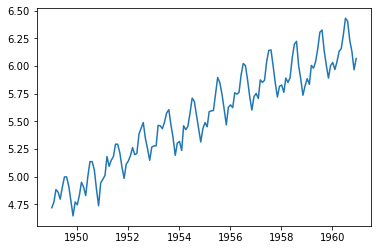

In [113]:
plt.plot(ts_log)

In [114]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

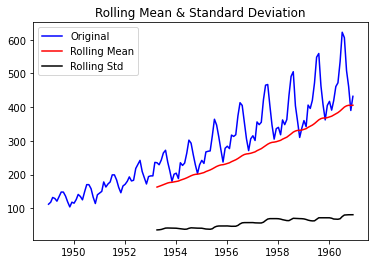

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [115]:
test_stationarity(data['#Passengers'])

In [116]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()

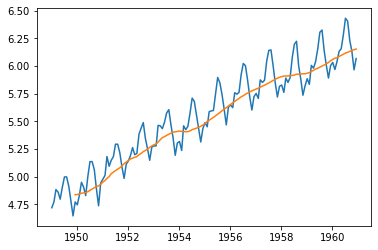

In [117]:
plt.plot(ts_log)
plt.plot(movingAverage)

In [118]:
ts_log_mv_diff=ts_log - movingAverage

In [119]:
ts_log_mv_diff.head()

Month
1949-01-06   NaN
1949-02-06   NaN
1949-03-06   NaN
1949-04-06   NaN
1949-05-06   NaN
Name: #Passengers, dtype: float64

In [120]:
ts_log_mv_diff.dropna(inplace=True)

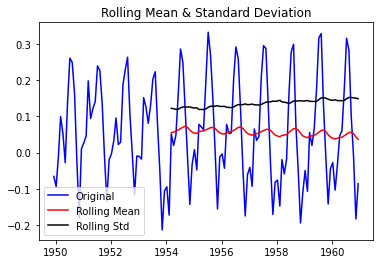

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [121]:
test_stationarity(ts_log_mv_diff)

In [122]:
ts_log_mv_diff.head()

Month
1949-12-06   -0.065494
1950-01-06   -0.093449
1950-02-06   -0.007566
1950-03-06    0.099416
1950-04-06    0.052142
Name: #Passengers, dtype: float64

In [123]:
data.tail()

,#Passengers
Month,
1960-08-06,606
1960-09-06,508
1960-10-06,461
1960-11-06,390
1960-12-06,432


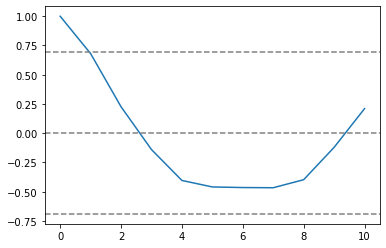

In [124]:
plt.plot(np.arange(0,11), acf(ts_log_mv_diff, nlags=10))   #Q= error term = MA
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)), linestyle= '--', color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)), linestyle= '--', color='gray')

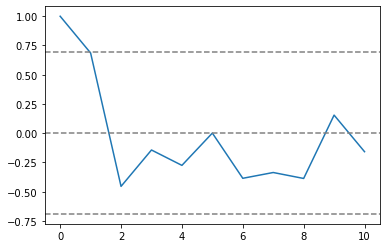

In [125]:
plt.plot(np.arange(0,11), pacf(ts_log_mv_diff, nlags=10))   #Q= error term = MA
plt.axhline(y=0, linestyle= '--', color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)), linestyle= '--', color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)), linestyle= '--', color='gray')

# 2 p=1 or 2 , AR

In [131]:
model=ARMA(ts_log_mv_diff, order=(2,1))

In [132]:
results=model.fit()

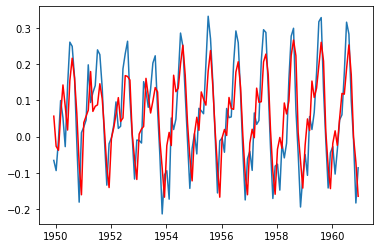

In [133]:
plt.plot(ts_log_mv_diff)
plt.plot(results.fittedvalues,color='red')

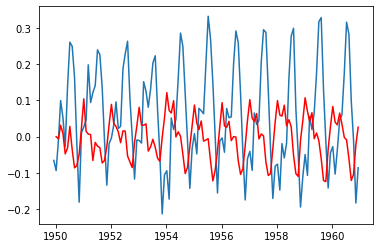

In [136]:
model=ARIMA(ts_log_mv_diff,order=(2,1,1))
results=model.fit()
plt.plot(ts_log_mv_diff)
plt.plot(results.fittedvalues,color='red')